# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Data Import

In [2]:
data = pd.read_csv("D:\\Vikas\\DataSets\\marketing_campaign_dataset.csv")
data

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [4]:
data.duplicated().sum()

0

# Data Exploration

In [5]:
#changing date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
#cleaning the symbols from data
data['Acquisition_Cost'] = pd.to_numeric(data['Acquisition_Cost'].replace({'\$':'', ',':''}, regex=True))

In [7]:
#deleteing 'days' from the cloumn 
data['Duration'] = data['Duration'].str.replace(' days', '').astype(int)

In [8]:
#cost per click
data['Cost_per_click'] = data['Acquisition_Cost'] / data['Clicks']

In [9]:
#Cost per Impression (cpi)
data['CPI'] = data['Acquisition_Cost'] / data['Impressions']

In [10]:
# Conversion Rate per Click (crpc)
data['CRPC'] = data['Conversion_Rate'] / data['Clicks']

In [11]:
#Revenue per Click(rpc)
data['RPC'] = (data['ROI'] * data['Acquisition_Cost']) / data['Clicks']

In [12]:
#Engagement per Impression(epi)
data['EPI'] = data['Engagement_Score'] / data['Impressions']

In [13]:
#Cost per Conversion
data['Cost_per_Conversion'] = data['Acquisition_Cost'] / (data['Conversion_Rate'] * data['Impressions'])

In [14]:
#Impressions to Click Ratio (Click-Through Rate)
data['CTR'] = data['Clicks'] / data['Impressions']

In [15]:
#Engagement to Clicks Ratio(ECR)
data['ECR'] = data['Engagement_Score'] / data['Clicks']

In [16]:
data.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Cost_per_click,CPI,CRPC,RPC,EPI,Cost_per_Conversion,CTR,ECR
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,31.964427,8.415193,0.000079,201.056245,0.003122,210.379813,0.263267,0.011858
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,99.706897,1.537419,0.001034,559.355690,0.000930,12.811822,0.015419,0.060345
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,17.465753,1.325019,0.000120,125.404110,0.000130,18.928850,0.075864,0.001712
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,58.635945,6.991209,0.000507,325.429493,0.003846,63.556444,0.119231,0.032258
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,43.408971,3.916210,0.000132,282.158311,0.000714,78.324209,0.090217,0.007916
5,6,DataTech Solutions,Display,All Ages,15,Instagram,0.07,9716.0,4.36,New York,German,100,1643,1,Foodies,2021-01-06,97.160000,5.913573,0.000700,423.617600,0.000609,84.479610,0.060864,0.010000
6,7,NexGen Systems,Email,Women 35-44,60,Website,0.13,11067.0,2.86,Los Angeles,Spanish,817,8749,10,Tech Enthusiasts,2021-01-07,13.545900,1.264945,0.000159,38.741273,0.001143,9.730343,0.093382,0.012240
7,8,DataTech Solutions,Search,Men 18-24,45,Google Ads,0.08,13280.0,5.55,Los Angeles,Mandarin,624,7854,7,Outdoor Adventurers,2021-01-08,21.282051,1.690858,0.000128,118.115385,0.000891,21.135727,0.079450,0.011218
8,9,Alpha Innovations,Social Media,Women 35-44,15,Facebook,0.09,18066.0,6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2021-01-09,20.982578,10.299886,0.000105,141.212753,0.003421,114.443177,0.490878,0.006969
9,10,TechCorp,Email,Women 35-44,15,Instagram,0.09,13766.0,3.78,Los Angeles,English,642,3856,3,Tech Enthusiasts,2021-01-10,21.442368,3.570021,0.000140,81.052150,0.000778,39.666897,0.166494,0.004673


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Campaign_ID          200000 non-null  int64         
 1   Company              200000 non-null  object        
 2   Campaign_Type        200000 non-null  object        
 3   Target_Audience      200000 non-null  object        
 4   Duration             200000 non-null  int32         
 5   Channel_Used         200000 non-null  object        
 6   Conversion_Rate      200000 non-null  float64       
 7   Acquisition_Cost     200000 non-null  float64       
 8   ROI                  200000 non-null  float64       
 9   Location             200000 non-null  object        
 10  Language             200000 non-null  object        
 11  Clicks               200000 non-null  int64         
 12  Impressions          200000 non-null  int64         
 13  Engagement_Sco

In [18]:
data.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Cost_per_click,CPI,CRPC,RPC,EPI,Cost_per_Conversion,CTR,ECR
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,37.503975,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710,32.008490,3.193943,0.000205,160.334163,0.001402,63.313228,0.140405,0.014091
std,57735.171256,16.746720,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581,26.926121,2.698980,0.000198,153.655263,0.001363,96.651806,0.130881,0.013736
min,1.000000,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000,5.021084,0.501401,0.000010,10.487445,0.000100,3.342676,0.010054,0.001000
25%,50000.750000,30.000000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000,15.091967,1.508453,0.000082,65.494224,0.000544,18.034073,0.058606,0.005445
50%,100000.500000,30.000000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000,22.774008,2.269956,0.000145,111.175156,0.000997,33.315114,0.099789,0.010011
75%,150000.250000,45.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000,38.599088,3.837796,0.000249,193.221843,0.001707,68.978203,0.169699,0.017143
max,200000.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000,199.960000,19.896104,0.001500,1536.876000,0.010000,1989.610390,0.992024,0.100000


# Correlation Analysis

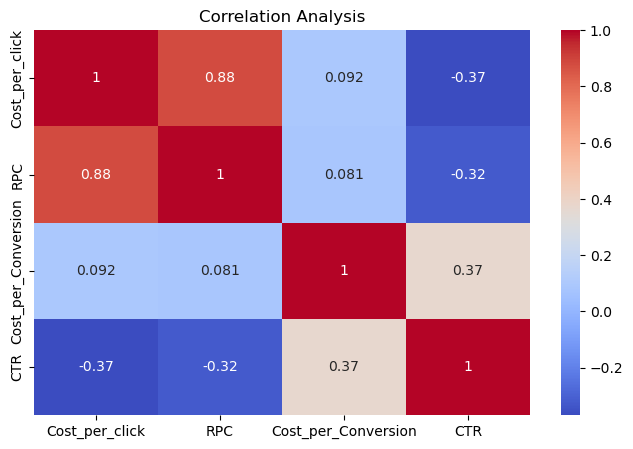

In [19]:
#Correlation Analysis
correlation_matrix = data[['Cost_per_click', 'RPC', 'Cost_per_Conversion', 'CTR']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

# Campaign Performance Analysis

In [20]:
#Average ROI

average_roi = data.groupby('Campaign_Type').agg({'ROI': 'mean'}).reset_index()
print(average_roi)

  Campaign_Type       ROI
0       Display  5.006551
1         Email  4.994295
2    Influencer  5.011068
3        Search  5.008357
4  Social Media  4.991784


In [21]:
#Average conversion rate by campaign type 

average_coversion_rate = data.groupby('Campaign_Type').agg({'Conversion_Rate': 'mean'}).reset_index()
print(average_coversion_rate)

  Campaign_Type  Conversion_Rate
0       Display         0.080089
1         Email         0.079788
2    Influencer         0.080315
3        Search         0.080021
4  Social Media         0.080135


In [22]:
#Average Acquisition Cost and Clicks

cost_analysis = data.groupby("Campaign_Type").agg({'Acquisition_Cost': 'mean','Clicks' : 'mean'}).reset_index()
print(cost_analysis)

  Campaign_Type  Acquisition_Cost      Clicks
0       Display      12508.034461  550.953535
1         Email      12495.346100  549.232556
2    Influencer      12507.170330  548.623491
3        Search      12498.736459  548.650148
4  Social Media      12512.698094  551.415827


In [23]:
#Cost per Click (CPC) Analysis

cpc_analysis = data.groupby('Campaign_Type').agg({'Cost_per_click': 'mean'}).reset_index()
print(cpc_analysis)

  Campaign_Type  Cost_per_click
0       Display       31.923675
1         Email       32.039639
2    Influencer       32.102571
3        Search       31.960865
4  Social Media       32.015596


In [24]:
#Cost per Impression Analysis

cpi_analysis = data.groupby('Campaign_Type').agg({'CPI': 'mean'}).reset_index()
print(cpi_analysis)

  Campaign_Type       CPI
0       Display  3.201639
1         Email  3.174041
2    Influencer  3.200984
3        Search  3.187726
4  Social Media  3.205308


In [25]:
#Conversion Rate per Click (CRPC) Analysis

crpc_analysis = data.groupby('Campaign_Type').agg({'CRPC': 'mean'}).reset_index()
print(crpc_analysis)

  Campaign_Type      CRPC
0       Display  0.000205
1         Email  0.000205
2    Influencer  0.000206
3        Search  0.000205
4  Social Media  0.000205


In [26]:
#Revenue per Click Analysis

rpc_analysis = data.groupby('Campaign_Type').agg({'RPC': 'mean'}).reset_index()
print(rpc_analysis)

  Campaign_Type         RPC
0       Display  160.047953
1         Email  160.264490
2    Influencer  161.070775
3        Search  160.015563
4  Social Media  160.269557


In [27]:
#Cost per Conversion Analysis

cost_per_conversion_analysis = data.groupby('Campaign_Type').agg({'Cost_per_Conversion': 'mean'}).reset_index()
print(cost_per_conversion_analysis)

  Campaign_Type  Cost_per_Conversion
0       Display            64.058286
1         Email            63.637292
2    Influencer            63.139284
3        Search            62.864450
4  Social Media            62.868586


In [28]:
#Click-Through Rate (CTR) Analysis

ctr_analysis = data.groupby('Campaign_Type').agg({'CTR': 'mean'}).reset_index()
print(ctr_analysis)

  Campaign_Type       CTR
0       Display  0.141265
1         Email  0.139489
2    Influencer  0.140300
3        Search  0.139936
4  Social Media  0.141041


In [29]:
#Engagement to Clicks Analysis

engagement_clicks_analysis = data.groupby('Campaign_Type').agg({'ECR': 'mean'}).reset_index()
print(engagement_clicks_analysis)

  Campaign_Type       ECR
0       Display  0.014030
1         Email  0.014083
2    Influencer  0.014176
3        Search  0.014093
4  Social Media  0.014071


# Target Audience Analysis

In [30]:
# Audience Insights: Performance by Target Audience

audience_insight = data.groupby('Target_Audience').agg(
    {'ROI': 'mean','Conversion_Rate': 'mean','Acquisition_Cost': 'mean','Clicks' : 'mean'}).reset_index()
print(audience_insight)

  Target_Audience       ROI  Conversion_Rate  Acquisition_Cost      Clicks
0        All Ages  5.005174         0.079975      12501.914915  548.871811
1       Men 18-24  4.982853         0.080240      12523.299195  548.879775
2       Men 25-34  5.020627         0.080132      12480.618344  550.042176
3     Women 25-34  4.997351         0.079899      12500.490940  551.112064
4     Women 35-44  5.006330         0.080102      12515.623857  549.961398


# Monthly ROI Trends

      Month       ROI
0   2021-01  5.014595
1   2021-02  5.005248
2   2021-03  4.983404
3   2021-04  4.994372
4   2021-05  5.018923
5   2021-06  4.985203
6   2021-07  4.983045
7   2021-08  4.997793
8   2021-09  5.029044
9   2021-10  5.016445
10  2021-11  4.999271
11  2021-12  5.002122


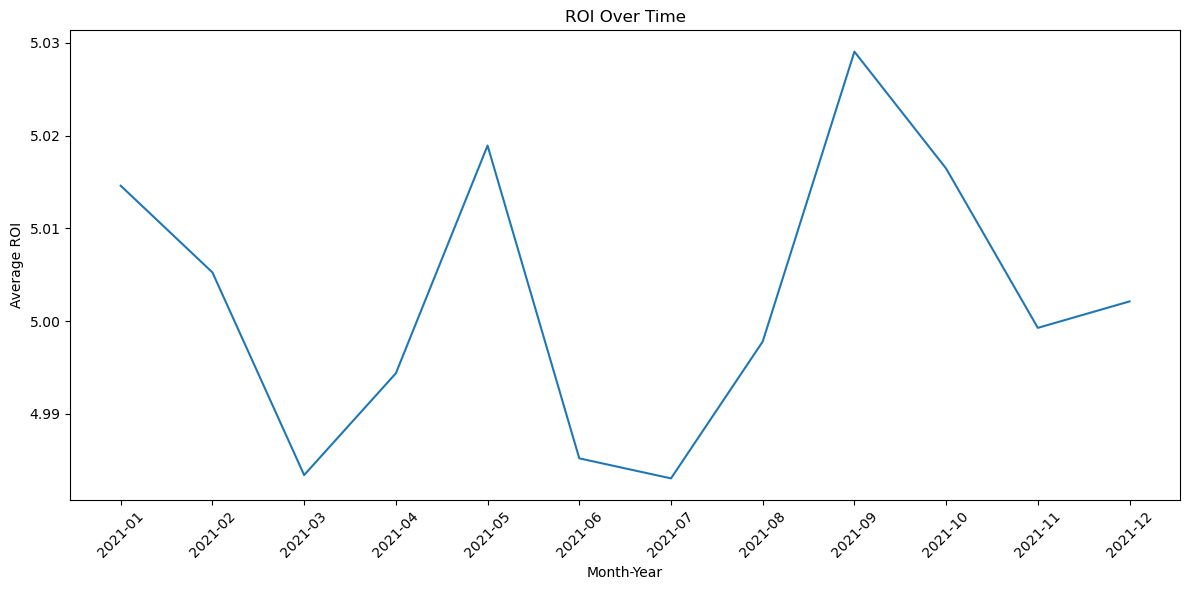

In [31]:
# Average Monthly ROI from Campaigns

data['Month'] = data['Date'].dt.to_period('M')
monthly_revenue = data.groupby('Month').agg({'ROI': 'mean'}).reset_index()

print(monthly_revenue)

data['Month_Year'] = data['Date'].dt.to_period('M')
roi_over_time = data.groupby('Month_Year')['ROI'].mean().reset_index()
roi_over_time['Month_Year'] = roi_over_time['Month_Year'].astype(str)


plt.figure(figsize=(12, 6))
plt.plot(roi_over_time['Month_Year'], roi_over_time['ROI'])
plt.title('ROI Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Location Based Analysis

In [32]:
#Performance by Location

location_analysis = data.groupby('Location').agg({'ROI': 'mean','Conversion_Rate': 'mean','Clicks': 'sum'}).reset_index()
print(location_analysis)

      Location       ROI  Conversion_Rate    Clicks
0      Chicago  5.001590         0.080134  21978398
1      Houston  5.007203         0.079948  21892547
2  Los Angeles  5.010876         0.080013  21966553
3        Miami  5.012282         0.080047  22056765
4     New York  4.980228         0.080204  22060143


# Language Based Analysis

In [33]:
# Performance by Language

language_analysis = data.groupby('Language').agg({'ROI': 'mean','Clicks': 'sum'}).reset_index()
print(language_analysis)

   Language       ROI    Clicks
0   English  4.990734  21956976
1    French  5.011375  21893746
2    German  5.001054  21940052
3  Mandarin  5.007313  22138254
4   Spanish  5.001705  22025378


# Engagement Analysis

In [34]:
#Engagement per Impression Analysis
engagement_analysis = data.groupby('Channel_Used').agg({'EPI': 'mean'}).reset_index()
print(engagement_analysis)

  Channel_Used       EPI
0        Email  0.001401
1     Facebook  0.001407
2   Google Ads  0.001388
3    Instagram  0.001397
4      Website  0.001410
5      YouTube  0.001408


# Customer Segment

In [35]:
#Customer Segment-Based Analysis
segment_analysis = data.groupby('Customer_Segment').agg(
    {'ROI': 'mean', 'Clicks': 'sum', 'Acquisition_Cost': 'mean'}).reset_index()
print(segment_analysis)

      Customer_Segment       ROI    Clicks  Acquisition_Cost
0         Fashionistas  5.000962  21855164      12503.445574
1              Foodies  5.004376  22080774      12524.558148
2    Health & Wellness  5.003202  21953923      12504.418346
3  Outdoor Adventurers  4.999393  22028553      12509.128540
4     Tech Enthusiasts  5.004234  22035992      12480.392991


# Channel Analysis

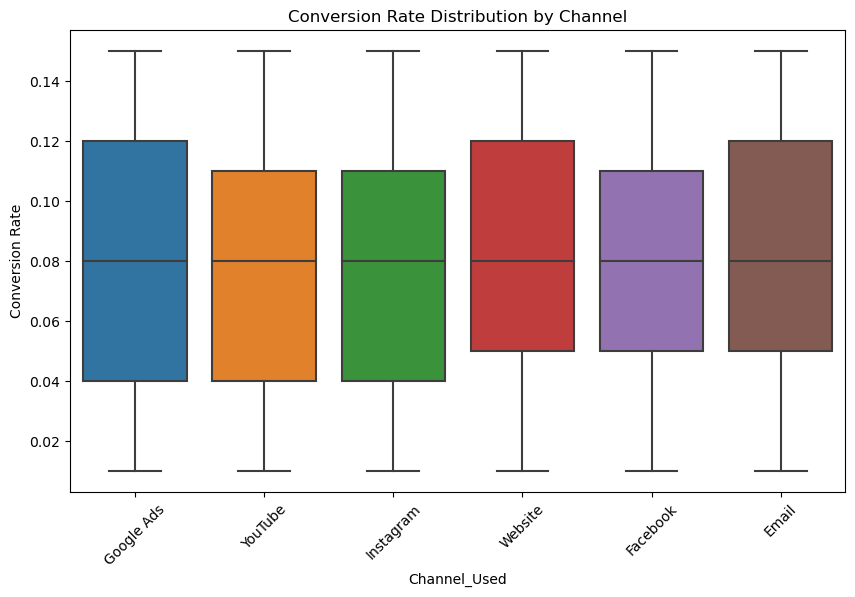

In [36]:
# Conversion Rate by Channel Used
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel_Used', y='Conversion_Rate', data=data)
plt.title('Conversion Rate Distribution by Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()